In [2]:
# Beer consumption Analysis and prediction using Linear Regression in Machine Learning
import numpy as np
import pandas as pd
beer = pd.read_csv("beer.csv")

In [3]:
beer.head(5)

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,1/1/2015,"27,3","23,9","32,5",0,0,25.461
1,1/2/2015,"27,02","24,5","33,5",0,0,28.972
2,1/3/2015,"24,82","22,4","29,9",0,1,30.814
3,1/4/2015,"23,98","21,5","28,6","1,2",1,29.799
4,1/5/2015,"23,82",21,"28,3",0,0,28.900


In [5]:
beer.columns

Index(['Data', 'Temperatura Media (C)', 'Temperatura Minima (C)',
       'Temperatura Maxima (C)', 'Precipitacao (mm)', 'Final de Semana',
       'Consumo de cerveja (litros)'],
      dtype='object')

dimensions of rows and columns

In [6]:
beer.shape

(365, 7)

**EDA**

first, using the normal describe command which just displays the columns of the dataset with the data.

In [7]:
beer.describe

<bound method NDFrame.describe of            Data Temperatura Media (C) Temperatura Minima (C)  \
0      1/1/2015                  27,3                   23,9   
1      1/2/2015                 27,02                   24,5   
2      1/3/2015                 24,82                   22,4   
3      1/4/2015                 23,98                   21,5   
4      1/5/2015                 23,82                     21   
..          ...                   ...                    ...   
360  12/27/2015                    24                   21,1   
361  12/28/2015                 22,64                   21,1   
362  12/29/2015                 21,68                   20,3   
363  12/30/2015                 21,38                   19,3   
364  12/31/2015                 24,76                   20,2   

    Temperatura Maxima (C) Precipitacao (mm)  Final de Semana  \
0                     32,5                 0                0   
1                     33,5                 0                0   
2 

with describe() command the mathematical description of data inside the dataset is produced namely count, mean od data, its standard deviation, min values, maximumvalues etc.

In [8]:
beer.describe()

,Final de Semana,Consumo de cerveja (litros)
count,365.000000,365.000000
mean,0.284932,25.401367
std,0.452001,4.399143
min,0.000000,14.343000
25%,0.000000,22.008000
50%,0.000000,24.867000
75%,1.000000,28.631000
max,1.000000,37.937000


DATA CLEANING

In [10]:
beer.isna()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
360,False,False,False,False,False,False,False
361,False,False,False,False,False,False,False
362,False,False,False,False,False,False,False
363,False,False,False,False,False,False,False


In [11]:
# observing if any nan or missing values present or not
beer.isna().any()

Data                           False
Temperatura Media (C)          False
Temperatura Minima (C)         False
Temperatura Maxima (C)         False
Precipitacao (mm)              False
Final de Semana                False
Consumo de cerveja (litros)    False
dtype: bool

In [18]:
 # dropping any rows present with nan values
beer.dropna(how='all', inplace=True)

In [19]:
# replacing commas with period(dot)
beer.replace({',':'.'},regex = True, inplace=True)

In [20]:
# converting the type of data to date time
beer['Data'] = pd.to_datetime(beer['Data'])

In [47]:
#timestamp = date.map(lambda x : dateutil.parser.parse(x))
#beer = beer.apply(pd.to_numeric)

beer = beer.astype({'Temperatura Media (C)':'float','Temperatura Minima (C)':'float','Temperatura Maxima (C)':'float','Consumo de cerveja (litros)':'float'})

In [48]:
# converting weekdays to weekends
beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Data                         365 non-null    datetime64[ns]
 1   Temperatura Media (C)        365 non-null    float64       
 2   Temperatura Minima (C)       365 non-null    float64       
 3   Temperatura Maxima (C)       365 non-null    float64       
 4   Precipitacao (mm)            365 non-null    object        
 5   Final de Semana              365 non-null    int64         
 6   Consumo de cerveja (litros)  365 non-null    float64       
 7   Day                          365 non-null    object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 22.9+ KB


In [61]:
days = ['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

beer['Day'] = beer['Day'].replace({'Monday':1,'Tuesday':2, 'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':0})

beer.drop(['Data'], axis=1)

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Day
0,27.30,23.9,32.5,0,0,25.461,4
1,27.02,24.5,33.5,0,0,28.972,5
2,24.82,22.4,29.9,0,1,30.814,6
3,23.98,21.5,28.6,1.2,1,29.799,0
4,23.82,21.0,28.3,0,0,28.900,1
...,...,...,...,...,...,...,...
360,24.00,21.1,28.2,13.6,1,32.307,0
361,22.64,21.1,26.7,0,0,26.095,1
362,21.68,20.3,24.1,10.3,0,22.309,2
363,21.38,19.3,22.4,6.3,0,20.467,3


In [64]:
#beer['Day']=beer['Data'].apply(lambda a: days[a.weekday()])
beer.head(5)

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Day
0,1420070400000000000,27.30,23.9,32.5,0,0,25.461,4
1,1420156800000000000,27.02,24.5,33.5,0,0,28.972,5
2,1420243200000000000,24.82,22.4,29.9,0,1,30.814,6
3,1420329600000000000,23.98,21.5,28.6,1.2,1,29.799,0
4,1420416000000000000,23.82,21.0,28.3,0,0,28.900,1


In [65]:
beer.columns

Index(['Data', 'Temperatura Media (C)', 'Temperatura Minima (C)',
       'Temperatura Maxima (C)', 'Precipitacao (mm)', 'Final de Semana',
       'Consumo de cerveja (litros)', 'Day'],
      dtype='object')

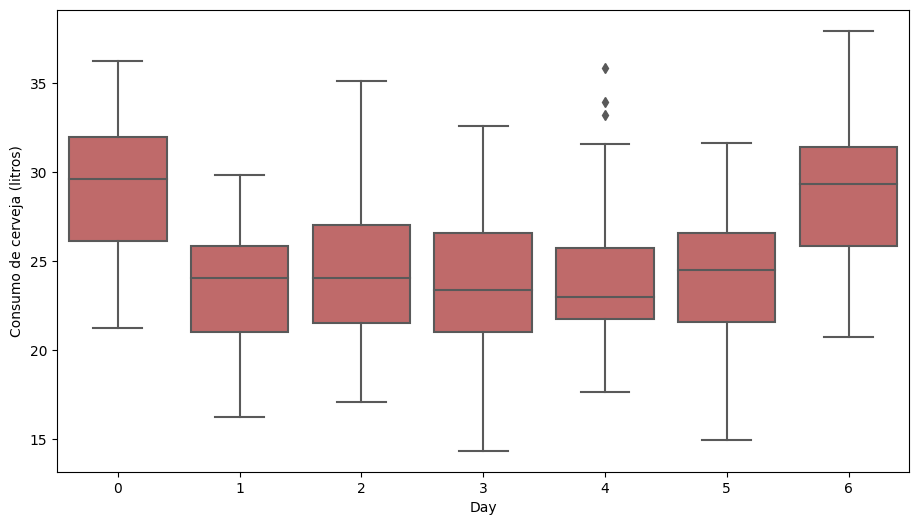

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(11,6))
ax = sns.boxplot(data=beer, x='Day',y='Consumo de cerveja (litros)', color="indianred")

<Axes: xlabel='Consumo de cerveja (litros)', ylabel='Count'>

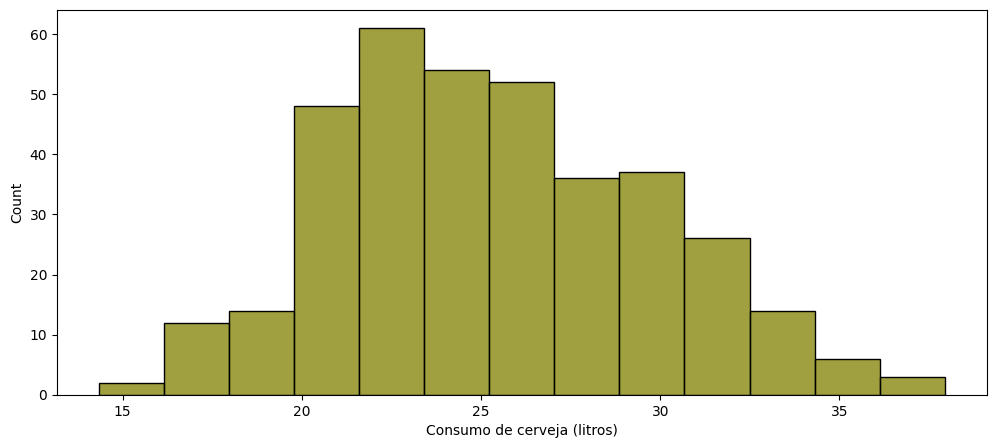

In [112]:
plt.figure(figsize=(12,5))
sns.histplot(beer , x="Consumo de cerveja (litros)" , color='olive')

<Axes: xlabel='Precipitacao (mm)', ylabel='Count'>

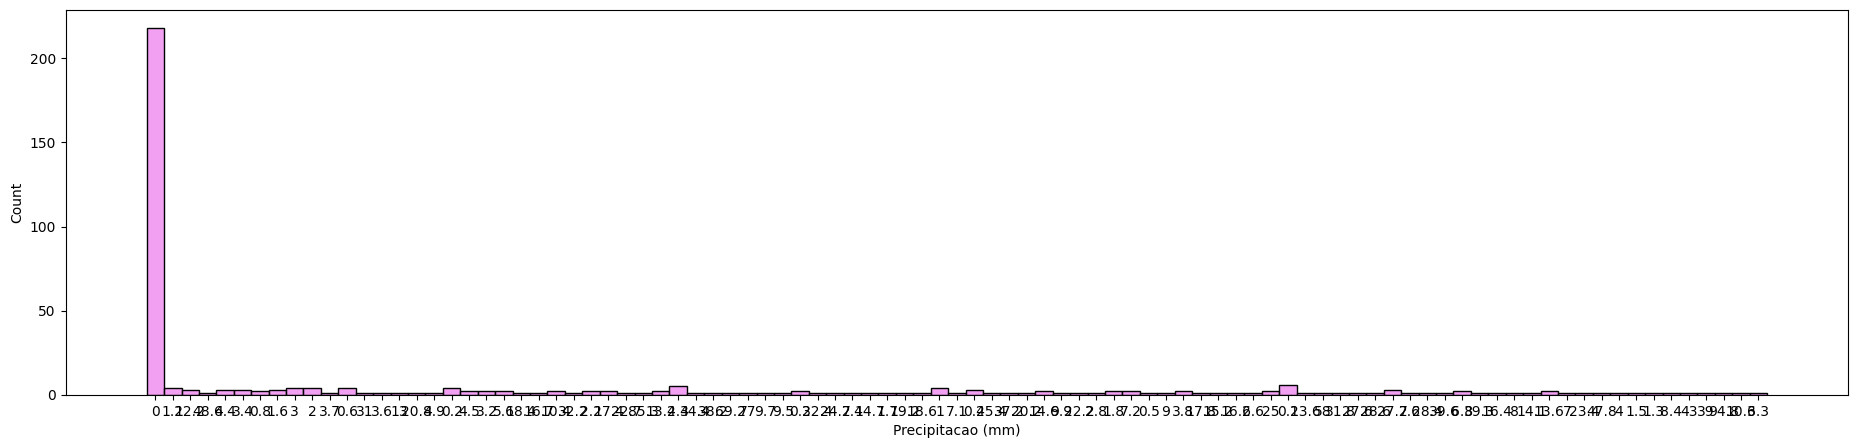

In [127]:
plt.figure(figsize=(23,5))
sns.histplot(beer , x="Precipitacao (mm)" , color='violet')

<Axes: xlabel='Final de Semana', ylabel='Count'>

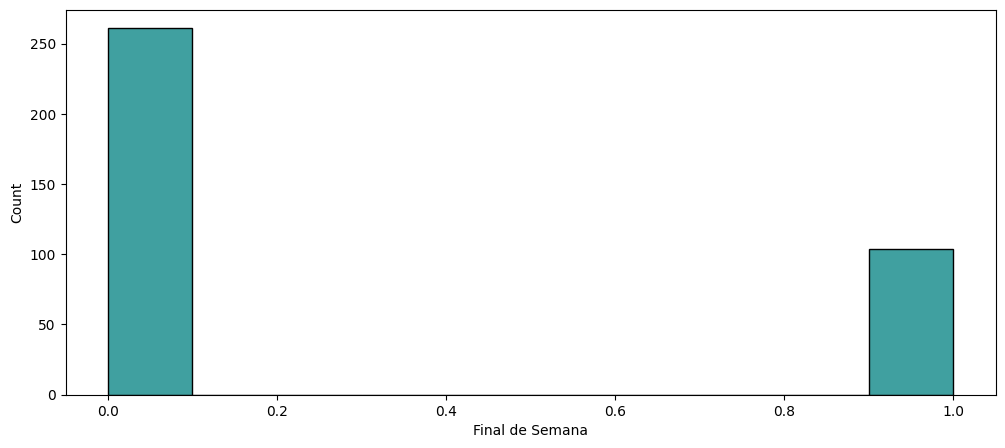

In [117]:
plt.figure(figsize=(12,5))
sns.histplot(beer , x="Final de Semana" , color='teal')

<Axes: xlabel='Precipitacao (mm)', ylabel='Day'>

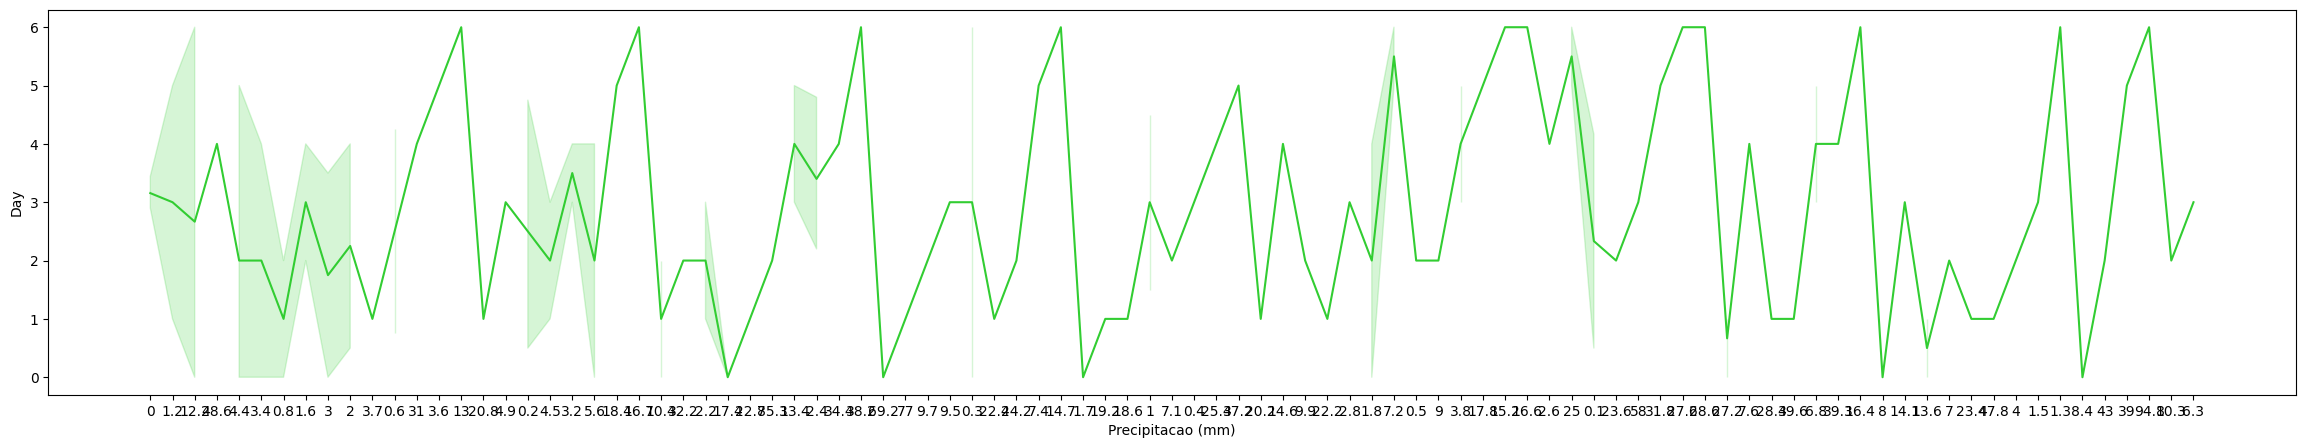

In [126]:
plt.figure(figsize=(29,5))
sns.lineplot(x='Precipitacao (mm)', y='Day', data=beer, color='limegreen')

<Axes: xlabel='Precipitacao (mm)', ylabel='Final de Semana'>

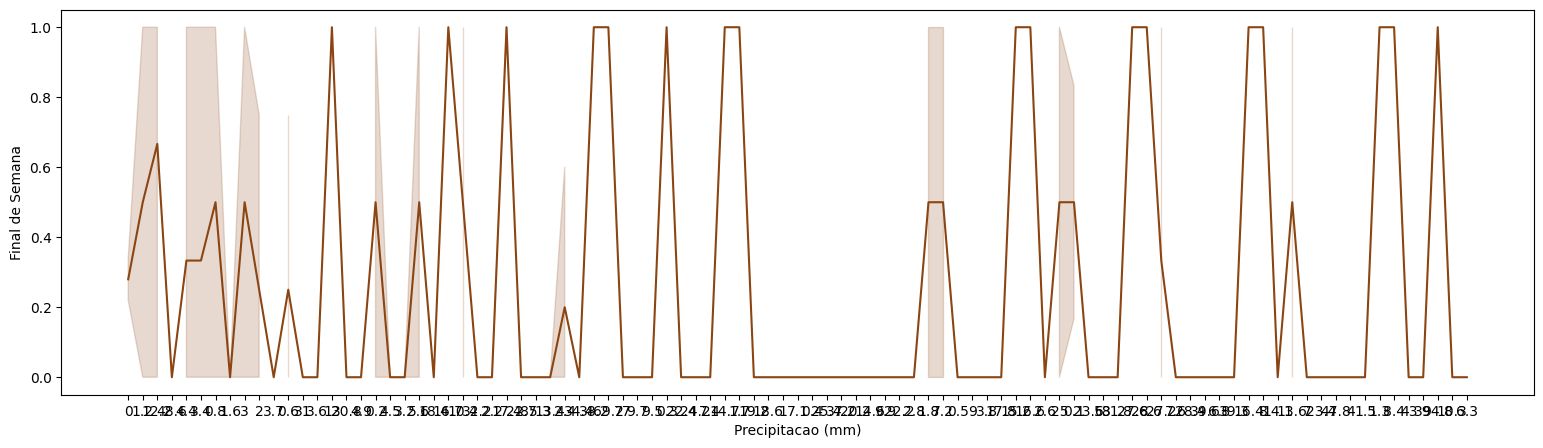

In [129]:
plt.figure(figsize=(19,5))
sns.lineplot(x='Precipitacao (mm)', y='Final de Semana', data=beer, color='saddlebrown')

<Figure size 1000x500 with 0 Axes>

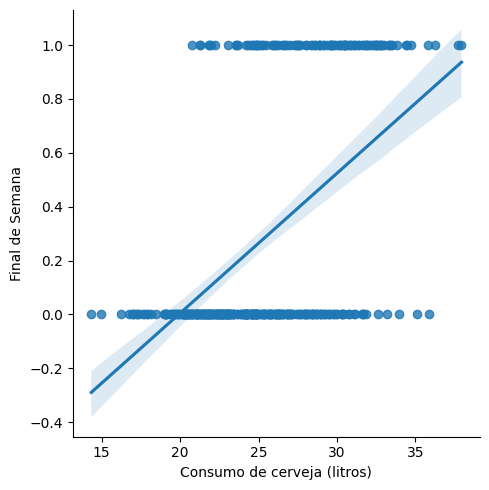

In [133]:
plt.figure(figsize=(10,5))
sns.lmplot(x= 'Consumo de cerveja (litros)', y='Final de Semana', data=beer)

In [85]:
from sklearn.model_selection import train_test_split

# dropping the target values
x = beer.drop("Data", axis=1)

y= beer['Consumo de cerveja (litros)']

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics

L=LinearRegression()
beer['Data'] = pd.to_numeric(pd.to_datetime(beer['Data']))
L.fit(xtrain,ytrain)

LinearRegression()

In [87]:
y_pred = L.predict(xtest)
print(L.score(xtest , ytest))

1.0


In [102]:
from sklearn.model_selection import train_test_split
x = beer.drop("Consumo de cerveja (litros)", axis=1)
y= beer['Consumo de cerveja (litros)']

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=32)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics

L=LinearRegression()
beer['Data'] = pd.to_numeric(pd.to_datetime(beer['Data']))
L.fit(xtrain,ytrain)
y_pred = L.predict(xtest)
print(L.score(xtest , ytest))

0.44753330684957426


In [70]:
y_pred

array([26.36476346, 27.38357735, 29.51945925, 24.24788941, 28.41127772,
       20.49956302, 25.06477236, 21.15087143, 20.76139266, 22.75227083,
       28.39966701, 27.80594359, 22.59541924, 26.80878518, 22.9637712 ,
       24.86539129, 30.0535599 , 23.1264367 , 26.60473775, 24.73355932,
       30.1660252 , 22.39744558, 26.00566154, 20.38451303, 21.48328967,
       25.64000457, 24.74727957, 29.82904921, 25.92465065, 26.8759044 ,
       25.33346274, 26.53546932, 30.11199202, 28.36456217, 24.78968375,
       23.91899357, 28.33134898, 25.17047699, 27.31096035, 27.70890767,
       28.18383108, 28.46700732, 24.95220103, 22.04914598, 26.11424429,
       25.78056654, 26.43378333, 25.5369827 , 27.02452207, 25.53011284,
       24.13615029, 27.63571748, 27.54326356, 28.81473754, 21.21265299,
       27.30339868, 26.79924668, 27.38626656, 21.47241743, 25.90397454,
       23.69932148, 29.55983883, 25.91833692, 24.55715151, 29.53676997,
       26.01200698, 25.32848714, 22.0456233 , 21.87785279, 25.30

In [72]:
ytest

193    25.640
33     31.655
15     29.938
309    20.575
57     26.241
        ...  
203    19.029
82     21.617
94     32.713
192    33.298
325    31.933
Name: Consumo de cerveja (litros), Length: 73, dtype: float64

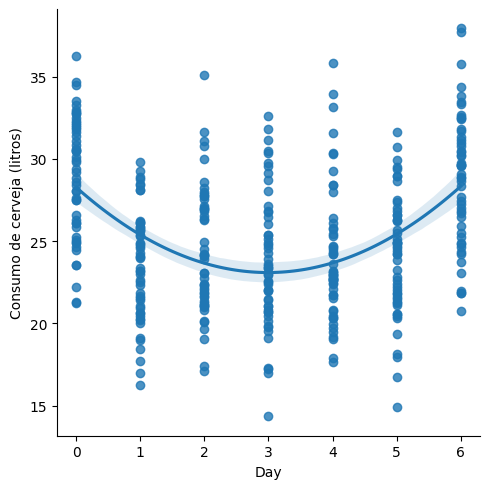

In [77]:
sns.lmplot(x ="Day", y ="Consumo de cerveja (litros)", data = beer, order = 2)
plt.show()

In [101]:
regr = LinearRegression()
regr.fit(xtrain, ytrain)
print(regr.score(xtest, ytest))
y_pred = regr.predict(xtest)


0.531384628597559


In [103]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(y_true=ytest, y_pred=y_pred)

#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true= ytest,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true= ytest,y_pred=y_pred,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 2.6345518760119706
MSE: 10.359020220783298
RMSE: 3.2185431829918483


<ipython-input-110-4dbc9bc8b4a6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_metrics = beer.corr()


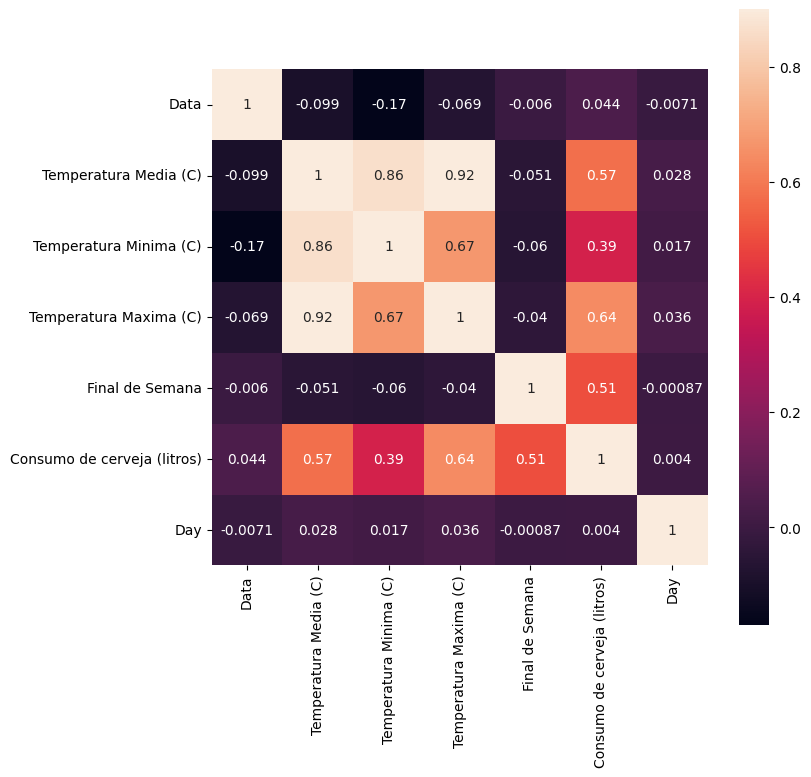

In [110]:
from sklearn.metrics import confusion_matrix #confusion matrix only displays␣info of numeric data
correlation_metrics = beer.corr()
fig = plt.figure(figsize = (8,8))
sns.heatmap(correlation_metrics , vmax = 0.9 , square = True, annot=True)
plt.show()